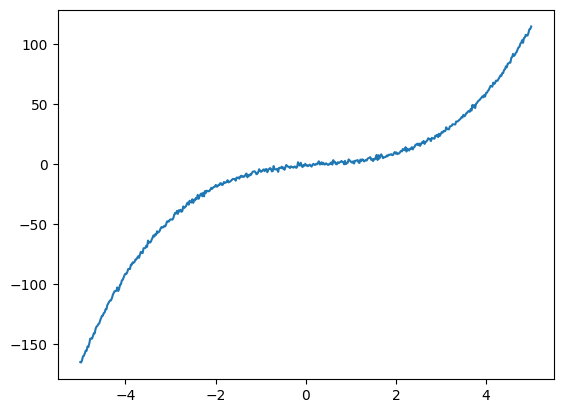

In [51]:
import torch
from matplotlib import pyplot as plt

X = torch.linspace(-5, 5, 500).unsqueeze(1)
Y = X**3 - X**2 + 3*X - 1 + torch.randn(X.size())

plt.plot(X, Y);

In [52]:
model = torch.nn.Sequential(
	torch.nn.Linear(1, 100),
	torch.nn.ReLU(),
	torch.nn.Linear(100, 100),
	torch.nn.ReLU(),
	torch.nn.Linear(100, 100),
	torch.nn.ReLU(),
	torch.nn.Linear(100, 1)
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
for i in range(1000):
	Y_pred = model(X)
	loss = ((Y_pred - Y)**2).mean()
	# L1 regularization over all weights
	# loss += 0.001 * sum([torch.abs(p).sum() for p in model.parameters()])
	optimizer.zero_grad()
	loss.backward()
	optimizer.step()
print(loss.item())

172.70777893066406


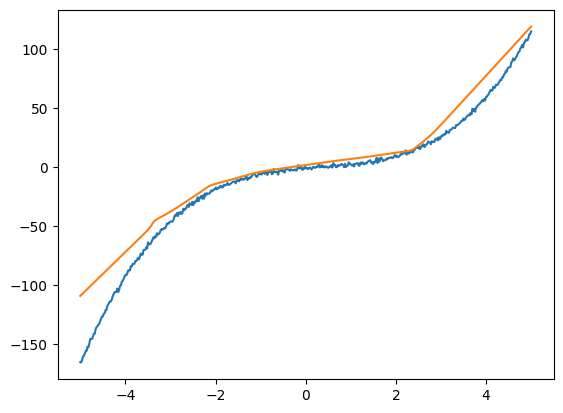

In [53]:
Y2 = model(X).detach()
plt.plot(X, Y)
plt.plot(X, Y2);